## Objective
Train a _Random Forest_ on a _real-world_-dataset on _heart failure prediction_.

*# Submission Guidelines
Your finished _Jupyter Notebook_ - both as `.ipynb` and exported `.pdf`.

# Background

![](images/heart-failure.jpg)

From the _World Health Organization_:

* Cardiovascular diseases (CVDs) are the leading cause of death globally.
* An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.
* Over three quarters of CVD deaths take place in low- and middle-income countries.
* Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2019, 38% were caused by CVDs.
* Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol.
* It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.

Apart from `Age` and `Sex`, you are given the following attributes to predict whether a person has suffered (or is likely to suffer) from a `HeartDisease` ($1$) or not ($0$):

* `ChestPainType`: type of chest pain.
    * _TA_: Typical Angina
    * _ATA_: Atypical Angina
    * _NAP_: Non-Anginal Pain
    * _ASY_: Asymptomatic
* `RestingBP`: resting blood pressure in _mmHg_.
* `Cholesterol`: serum cholesterol  in _mm/dl_.
* `FastingBS`: $1$ if the the fasting blood sugar is above 120 _mg/dl_.
* `RestingECG`: resting electrocardiogram results.
    * _Normal_: Normal
    * _ST_: having _ST-T_ wave abnormality (_T wave inversions_ and/or _ST elevation_ or depression higher than 0.05 _mV_)
    * _LVH_: showing probable or definite _left ventricular hypertrophy_ by _Estes' criteria_
* `MaxHR`: maximum heart rate achieved.
* `ExerciseAngina`: _Yes_, if the person suffers from exercise-induced angina.
* `Oldpeak`: measure of the depression occurring in the _ST_ segment (_mm_).
* `ST_Slope`: the slope of the peak exercise _ST_ segment.
    * _Up_: upsloping
    * _Flat_: flat
    * _Down_: downsloping

# Task

1. Load the data from the provided `.csv`-**files** into `X_train`, `y_train` and `X_test`.
    * This time you don't have access to the _test labels_! 
1. Perform a quick _EDA_ (_Exploratory Data Analysis_).
1. Create 2-3 visualizations to illustrate aspects of the data you think are interesting!
1. Encode the _categorical variables_ as you deem suitable.
    * As always, only `fit` the _encoder_ on the training data, not the test data!
    * Hint: You'll need both _ordinal_ and _one-hot_ encoding!
1. Feel free to apply any further preprocessing steps.
1. Train and evaluate a _random forest_ using _cross validation_ on `X_train`.
1. Train a model using the best combination of hyperparameters and preprocessing steps on all of `X_train` and make predictions on `X_test`.
1. You'll get `y_test` in the next lesson, to see how well your model performs on unseen data!

**Use the _random state_ $12$ whereever possible so we can compare our results across the class!**

In [42]:
my_random_state = 12

# 1. Loading The Data

In [59]:
import pandas as pd

X_train = pd.read_csv('./X_train.csv', index_col=0)
X_test = pd.read_csv('./X_test.csv', index_col=0)
y_train = pd.read_csv('./y_train.csv', index_col=0)['HeartDisease']
y_test = pd.read_csv('./y_test.csv', index_col=0)['HeartDisease']

# 2. EDA

In [44]:
data = pd.read_csv('./heart.csv')

data.sample(10, random_state=my_random_state)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
860,60,M,ASY,130,253,0,Normal,144,Y,1.4,Up,1
898,35,M,ATA,122,192,0,Normal,174,N,0.0,Up,0
595,60,M,ASY,130,186,1,LVH,140,Y,0.5,Flat,1
142,47,M,ASY,160,291,0,ST,158,Y,3.0,Flat,1
422,65,M,ASY,150,236,1,ST,105,Y,0.0,Flat,1
841,62,F,NAP,130,263,0,Normal,97,N,1.2,Flat,1
23,44,M,ATA,150,288,0,Normal,150,Y,3.0,Flat,1
887,43,M,ASY,132,247,1,LVH,143,Y,0.1,Flat,1
805,54,M,ASY,140,239,0,Normal,160,N,1.2,Up,0
494,60,M,ASY,142,216,0,Normal,110,Y,2.5,Flat,1


In [45]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# 3. Vizualization

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
palette_default = sns.color_palette(['lightsteelblue', 'lightcoral', 'lightgray', 'wheat', 'lightpink'])
palette_stroke = sns.color_palette(['lightgray', 'lightcoral'])

sns.set_palette(palette_default)

<Axes: xlabel='HeartDisease', ylabel='Age'>

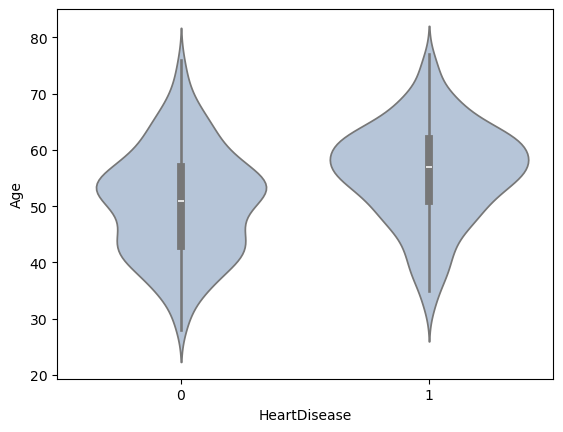

In [49]:
sns.violinplot(data=data, x='HeartDisease', y='Age')

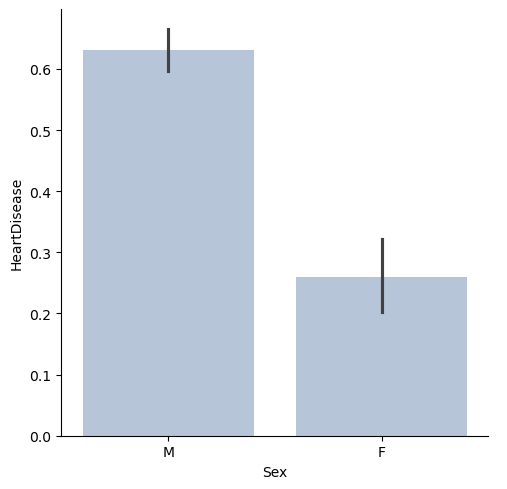

In [50]:
sns.catplot(x='Sex', y='HeartDisease', data=data, kind='bar')

<Axes: xlabel='Sex', ylabel='Cholesterol'>

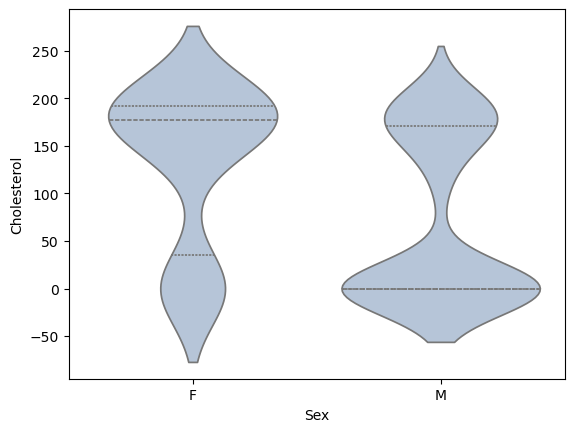

In [51]:
sns.violinplot(data=data[data['Cholesterol'] < 200], x='Sex', y='Cholesterol', inner='quartile')

C:\Users\fabia\AppData\Local\Temp\ipykernel_20688\2571748013.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data[data['Cholesterol'] < 200], x='HeartDisease', palette=palette_stroke, y='Cholesterol')


<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

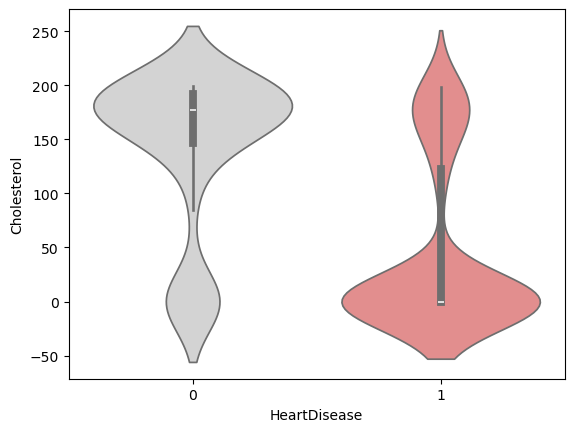

In [52]:
sns.violinplot(data=data[data['Cholesterol'] < 200], x='HeartDisease', palette=palette_stroke, y='Cholesterol')

<Axes: xlabel='Cholesterol_bin', ylabel='HeartDisease'>

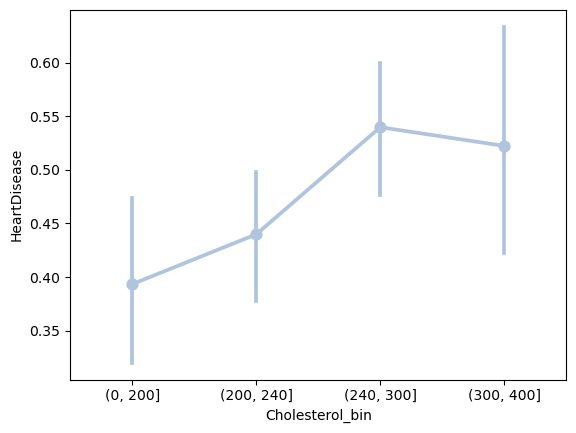

In [53]:
cholesterol_data = data[['Cholesterol', 'HeartDisease']].copy().dropna()
cholesterol_data['Cholesterol_bin'] = pd.cut(cholesterol_data['Cholesterol'], bins=[0, 200, 240, 300, 400])
sns.pointplot(x='Cholesterol_bin', y='HeartDisease', data=cholesterol_data)

# 4. Encoding

In [54]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [55]:
# Create and fit the encoder
ordinal_encoder = OrdinalEncoder()
X_train['Sex'] = ordinal_encoder.fit_transform(X_train[['Sex']])
X_test['Sex'] = ordinal_encoder.transform(X_test[['Sex']])

In [62]:
X_train.sample(10, random_state=1)
X_test.sample(10, random_state=1)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
685,61,M,ASY,120,260,0,Normal,140,Y,3.6,Flat,1.0,0.0,0.0,0.0
191,50,M,ATA,170,209,0,ST,116,N,0.0,Up,0.0,1.0,0.0,0.0
90,49,F,ATA,110,208,0,Normal,160,N,0.0,Up,0.0,1.0,0.0,0.0
817,60,M,ASY,125,258,0,LVH,141,Y,2.8,Flat,1.0,0.0,0.0,0.0
629,57,F,ASY,128,303,0,LVH,159,N,0.0,Up,1.0,0.0,0.0,0.0
638,47,M,ASY,112,204,0,Normal,143,N,0.1,Up,1.0,0.0,0.0,0.0
815,68,M,NAP,118,277,0,Normal,151,N,1.0,Up,0.0,0.0,1.0,0.0
57,58,M,NAP,130,213,0,ST,140,N,0.0,Flat,0.0,0.0,1.0,0.0
301,55,M,ATA,140,0,0,ST,150,N,0.2,Up,0.0,1.0,0.0,0.0
421,66,M,NAP,120,0,0,ST,120,N,-0.5,Up,0.0,0.0,1.0,0.0


In [ ]:
# Apply OneHotEncoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
one_hot_raw = pd.DataFrame(one_hot_encoder.fit_transform(X_train[['ChestPainType']]), columns=one_hot_encoder.get_feature_names_out())
one_hot_raw.index = X_train.index
X_train = pd.concat([X_train, one_hot_raw], axis=1)
X_train.drop(columns=['ChestPainType'])

one_hot_raw_test = pd.DataFrame(one_hot_encoder.transform(X_test[['ChestPainType']]), columns=one_hot_encoder.get_feature_names_out())
one_hot_raw_test.index = X_test.index
X_test = pd.concat([X_test, one_hot_raw_test], axis=1)
X_test.drop(columns=['ChestPainType'])

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
685,61,M,ASY,120,260,0,Normal,140,Y,3.6,Flat,1.0,0.0,0.0,0.0
191,50,M,ATA,170,209,0,ST,116,N,0.0,Up,0.0,1.0,0.0,0.0
90,49,F,ATA,110,208,0,Normal,160,N,0.0,Up,0.0,1.0,0.0,0.0
817,60,M,ASY,125,258,0,LVH,141,Y,2.8,Flat,1.0,0.0,0.0,0.0
629,57,F,ASY,128,303,0,LVH,159,N,0.0,Up,1.0,0.0,0.0,0.0
638,47,M,ASY,112,204,0,Normal,143,N,0.1,Up,1.0,0.0,0.0,0.0
815,68,M,NAP,118,277,0,Normal,151,N,1.0,Up,0.0,0.0,1.0,0.0
57,58,M,NAP,130,213,0,ST,140,N,0.0,Flat,0.0,0.0,1.0,0.0
301,55,M,ATA,140,0,0,ST,150,N,0.2,Up,0.0,1.0,0.0,0.0
421,66,M,NAP,120,0,0,ST,120,N,-0.5,Up,0.0,0.0,1.0,0.0


# 5. Furhter data preprocessing

In [ ]:
# First, check which columns have non-numeric values
for col in X_train.columns:
    if X_train[col].dtype == 'object':
        print(f"Column {col} has categorical values: {X_train[col].unique()}")

# For binary variables like Sex, we can use OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
binary_features = ['Sex', 'ExerciseAngina']
for feature in binary_features:
    if feature in X_train.columns:
        X_train[feature] = ordinal_encoder.fit_transform(X_train[[feature]])
        X_test[feature] = ordinal_encoder.transform(X_test[[feature]])

# For categorical variables with multiple categories, we use OneHotEncoder
categorical_features = ['ChestPainType', 'RestingECG', 'ST_Slope']
# Create OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)

# Apply encoding to training data
encoded_features = ohe.fit_transform(X_train[categorical_features])
# Create DataFrame with encoded column names
encoded_df = pd.DataFrame(
    encoded_features, 
    columns=ohe.get_feature_names_out(categorical_features),
    index=X_train.index
)
# Drop original columns and add encoded ones
X_train = pd.concat([X_train.drop(categorical_features, axis=1), encoded_df], axis=1)

# Apply the same transformation to test data
encoded_features_test = ohe.transform(X_test[categorical_features])
encoded_df_test = pd.DataFrame(
    encoded_features_test,
    columns=ohe.get_feature_names_out(categorical_features),
    index=X_test.index
)
X_test = pd.concat([X_test.drop(categorical_features, axis=1), encoded_df_test], axis=1)

Column Sex has categorical values: ['F' 'M']
Column ChestPainType has categorical values: ['NAP' 'TA' 'ASY' 'ATA']
Column RestingECG has categorical values: ['Normal' 'LVH' 'ST']
Column ExerciseAngina has categorical values: ['Y' 'N']
Column ST_Slope has categorical values: ['Up' 'Down' 'Flat']


# 6. Train and evaluate RF using CV on X_train  

In [68]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=my_random_state, n_estimators=300)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=12)

In [65]:
from sklearn import metrics

In [69]:
y_pred = rf_model.predict(X_test)

print('Accuracy: {:.2%}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

Accuracy: 89.57%
Precision: 90.55%
Recall: 90.55%
F1: 90.55%


In [70]:
print('Precision: {:.2%}'.format(metrics.precision_score(y_test, y_pred)))
print('Recall: {:.2%}'.format(metrics.recall_score(y_test, y_pred)))
print('F1: {:.2%}'.format(metrics.f1_score(y_test, y_pred)))

Precision: 90.55%
Recall: 90.55%
F1: 90.55%


# 7. Train a model using the best combination of hyperparameters and preprocessing 

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Training accuracy: 0.9869


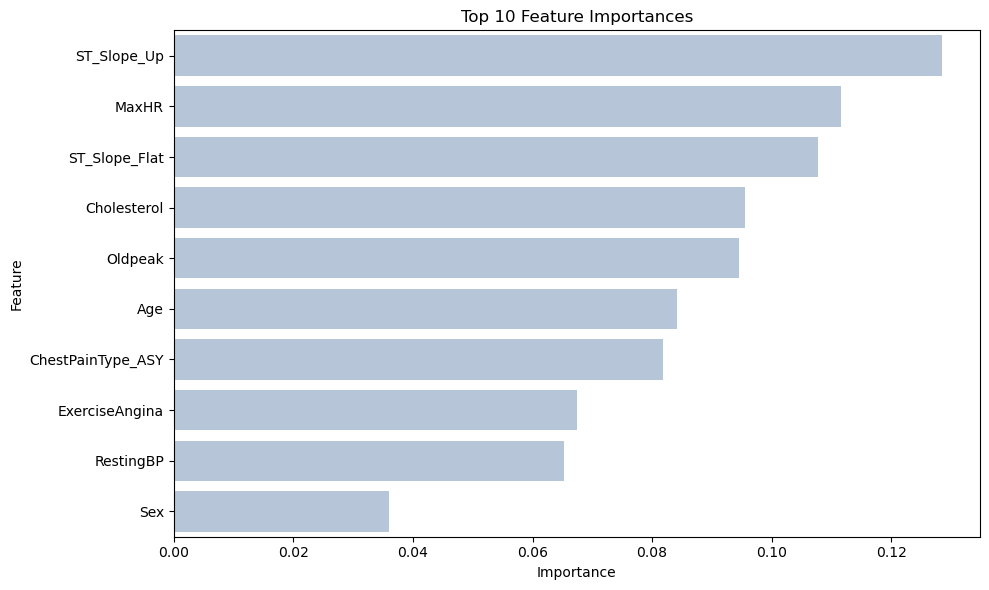

Predictions for test data have been saved to 'heart_disease_predictions.csv'


In [ ]:
# Define best hyperparameters (adjust these based on your cross-validation results)
best_params = {
    'n_estimators': 100,
    'max_depth': 10,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'bootstrap': True,
    'random_state': my_random_state
}

# Create and train the final model
final_model = RandomForestClassifier(**best_params)
final_model.fit(X_train, y_train)

# Evaluate the model on training data
y_train_pred = final_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy: {train_accuracy:.4f}")

# Display feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': final_model.feature_importances_
})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

# Make predictions on the test set
y_test_pred = final_model.predict(X_test)

# Save predictions for later evaluation
test_predictions = pd.DataFrame({
    'HeartDisease_Predicted': y_test_pred
})
test_predictions.index = X_test.index

# Calculate the predicted probabilities for the test set
y_test_proba = final_model.predict_proba(X_test)[:, 1]

# 8. Check how well your model performs on unseen data finally using y_test

Test accuracy: 0.9043478260869565
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       103
           1       0.91      0.91      0.91       127

    accuracy                           0.90       230
   macro avg       0.90      0.90      0.90       230
weighted avg       0.90      0.90      0.90       230



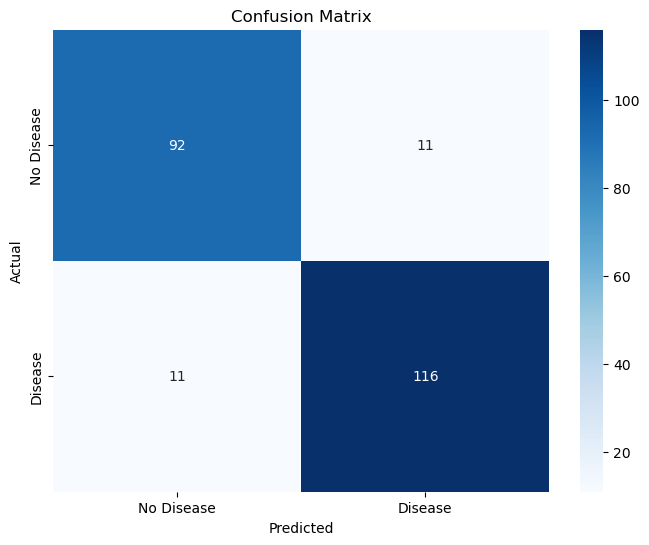

In [74]:
print("Test accuracy:", accuracy_score(y_test, y_test_pred))
print("Classification Report:")
print(classification_report(y_test, y_test_pred))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()